Setup and Directory Paths

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Base path
base_path = '/content/drive/MyDrive/sectoral_inflation_forecasting'

# Define specific paths based on your folder structure
simulated_data_path = os.path.join(base_path, 'data', 'simulated')
processed_data_path = os.path.join(base_path, 'data', 'processed')
plots_output_path = os.path.join(base_path, 'outputs', 'plots')
reports_output_path = os.path.join(base_path, 'outputs', 'reports')

# Create all necessary directories
os.makedirs(simulated_data_path, exist_ok=True)
os.makedirs(processed_data_path, exist_ok=True)
os.makedirs(plots_output_path, exist_ok=True)
os.makedirs(reports_output_path, exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Simulate Inflation Data & Save

In [2]:
# Parameters
countries = ['India', 'Germany', 'Denmark']
sectors = ['Food', 'Energy', 'Transport', 'Healthcare', 'Education']
years = list(range(2015, 2025))

np.random.seed(42)

# Generate synthetic data
records = []
for country in countries:
    for sector in sectors:
        base_inflation = np.random.uniform(2, 5)
        inflation_rates = base_inflation + np.random.normal(0, 0.5, len(years))
        for year, rate in zip(years, inflation_rates):
            records.append({'Country': country, 'Sector': sector, 'Year': year, 'Inflation_Rate': round(rate, 2)})

df = pd.DataFrame(records)

# Save CSV to simulated data folder
simulated_csv_path = os.path.join(simulated_data_path, 'sectoral_inflation_data.csv')
df.to_csv(simulated_csv_path, index=False)
print(f"Simulated data saved to: {simulated_csv_path}")


Simulated data saved to: /content/drive/MyDrive/sectoral_inflation_forecasting/data/simulated/sectoral_inflation_data.csv


Plot Inflation Trend (Energy Sector) & Save

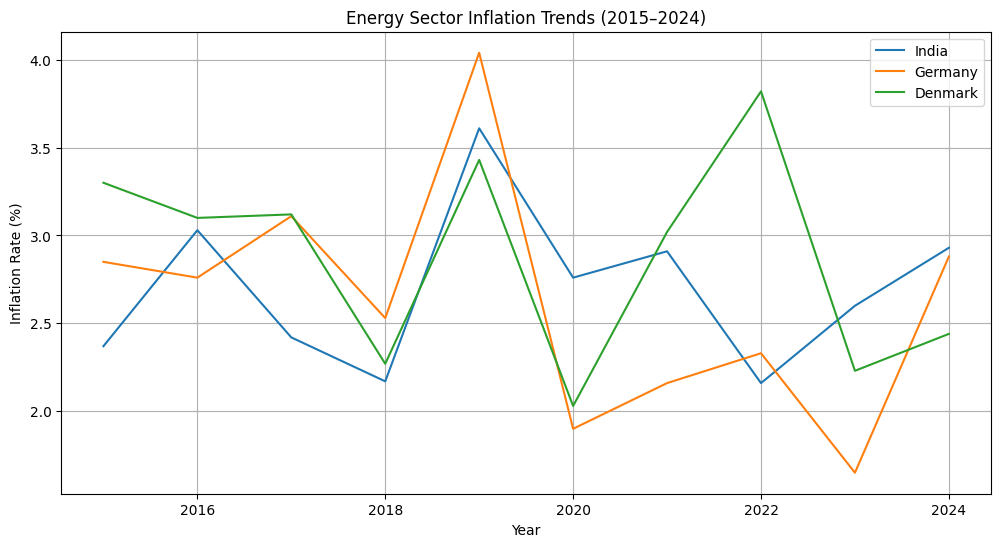

Plot saved to: /content/drive/MyDrive/sectoral_inflation_forecasting/outputs/plots/energy_sector_inflation_trends.png


In [3]:
# Filter and plot for Energy sector
plt.figure(figsize=(12, 6))

for country in countries:
    df_country = df[(df['Country'] == country) & (df['Sector'] == 'Energy')]
    plt.plot(df_country['Year'], df_country['Inflation_Rate'], label=country)

plt.title('Energy Sector Inflation Trends (2015–2024)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)

# Save plot
plot_path = os.path.join(plots_output_path, 'energy_sector_inflation_trends.png')
plt.savefig(plot_path)
plt.show()

print(f"Plot saved to: {plot_path}")
